# Dog Bite Incident Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###importing libraries#####

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [5]:
df = pd.read_csv("C:\\Users\\manzo\\Downloads\\archive (2)\\DOHMH_Dog_Bite_Data.csv")

In [6]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [7]:
df.tail()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308
22662,10280,December 29 2017,DOG,BOXER/PIT BULL,NaN,M,False,Staten Island,10314


In [8]:
df.shape

(22663, 9)

In [9]:
df.columns

Index(['UniqueID', 'DateOfBite', 'Species', 'Breed', 'Age', 'Gender',
       'SpayNeuter', 'Borough', 'ZipCode'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

UniqueID          0
DateOfBite        0
Species           0
Breed          2218
Age           11221
Gender            0
SpayNeuter        0
Borough           0
ZipCode        5858
dtype: int64

In [13]:
df.describe()

,UniqueID
count,22663.000000
mean,5715.036668
std,3354.278369
min,1.000000
25%,2833.500000
50%,5666.000000
75%,8499.000000
max,12383.000000


In [14]:
missing_percentage = (df.isnull().sum() / len(df)) * 100


In [15]:
missing_info = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})


In [16]:
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)


missing_info

In [17]:
missing_info

,Column,Missing Percentage
Age,Age,49.512421
ZipCode,ZipCode,25.848299
Breed,Breed,9.786877
UniqueID,UniqueID,0.000000
DateOfBite,DateOfBite,0.000000
Species,Species,0.000000
Gender,Gender,0.000000
SpayNeuter,SpayNeuter,0.000000
Borough,Borough,0.000000


In [18]:
df['Breed'].fillna('UNKNOWN', inplace=True)
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [19]:
df['ZipCode'].fillna('UNKNOWN', inplace=True)
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,UNKNOWN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [21]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [22]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


In [23]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,4.0,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,4.0,U,False,Brooklyn,UNKNOWN
2,3,January 06 2018,DOG,Pit Bull,4.0,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4.0,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,4.0,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7.0,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5.0,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",4.0,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,4.0,F,False,Staten Island,10308


In [24]:
df.isnull().sum()

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

In [25]:
df.dtypes

UniqueID        int64
DateOfBite     object
Species        object
Breed          object
Age           float64
Gender         object
SpayNeuter       bool
Borough        object
ZipCode        object
dtype: object

In [28]:
df['DateOfBite']= pd.to_datetime(df['DateOfBite'], format='%B %d %Y')

In [29]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,2018-01-01,DOG,UNKNOWN,4.0,U,False,Brooklyn,11220
1,2,2018-01-04,DOG,UNKNOWN,4.0,U,False,Brooklyn,UNKNOWN
2,3,2018-01-06,DOG,Pit Bull,4.0,U,False,Brooklyn,11224
3,4,2018-01-08,DOG,Mixed/Other,4.0,M,False,Brooklyn,11231
4,5,2018-01-09,DOG,Pit Bull,4.0,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,2017-12-24,DOG,CHIWEENIE MIX,7.0,M,True,Staten Island,10303
22659,10277,2017-12-24,DOG,DUNKER,5.0,F,True,Staten Island,10303
22660,10278,2017-12-21,DOG,"Schnauzer, Miniature",4.0,M,True,Staten Island,10312
22661,10279,2017-12-28,DOG,Mixed/Other,4.0,F,False,Staten Island,10308


In [30]:
df.dtypes

UniqueID               int64
DateOfBite    datetime64[ns]
Species               object
Breed                 object
Age                  float64
Gender                object
SpayNeuter              bool
Borough               object
ZipCode               object
dtype: object

In [31]:
df.nunique()

UniqueID      12383
DateOfBite     2555
Species           1
Breed          1651
Age              36
Gender            3
SpayNeuter        2
Borough           6
ZipCode         514
dtype: int64

# EDA

In [32]:
categorical_data = ['Gender', 'SpayNeuter', 'Borough']


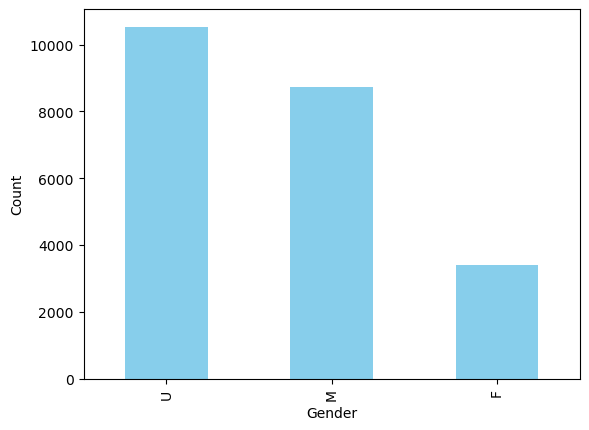

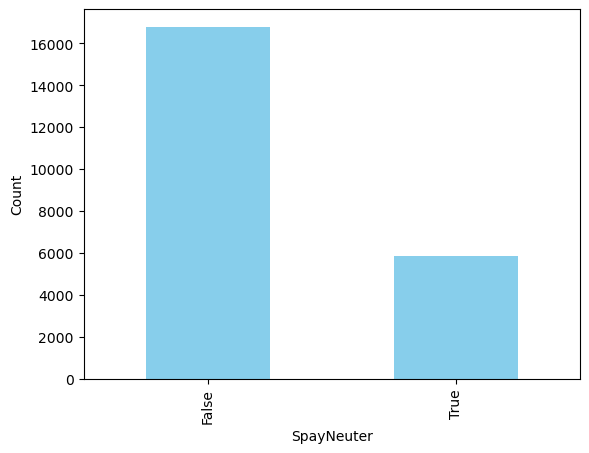

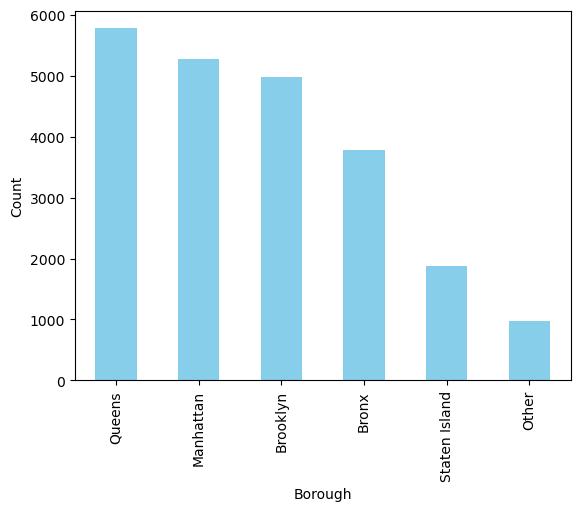

In [33]:
#function to plot the bar
for column in categorical_data:
    df[column].value_counts().plot(kind='bar', color = 'skyblue')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks      ##### Rotate x-labels for better readability#####
    plt.show()

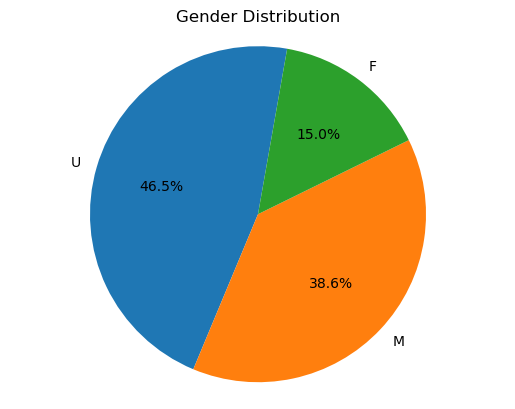

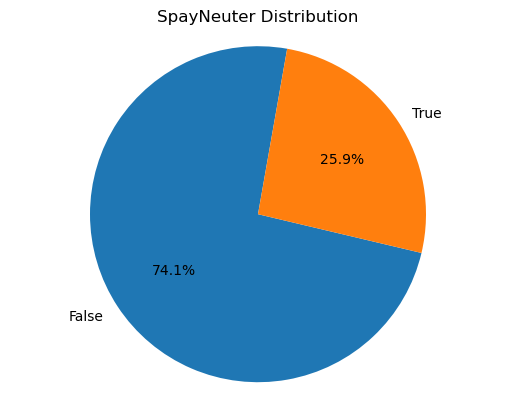

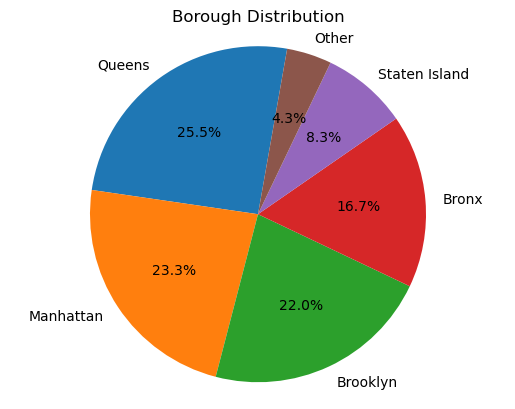

In [34]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']  # Add colors as needed


for column in categorical_data:
    plt.figure
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=80 )
#autopct string ,used to label the wedges with numeric value.the label will be placed inside the wedge
#the format string will ne fmt%pct.
    plt.title(f'{column} Distribution')
    plt.axis('equal')
    plt.show()

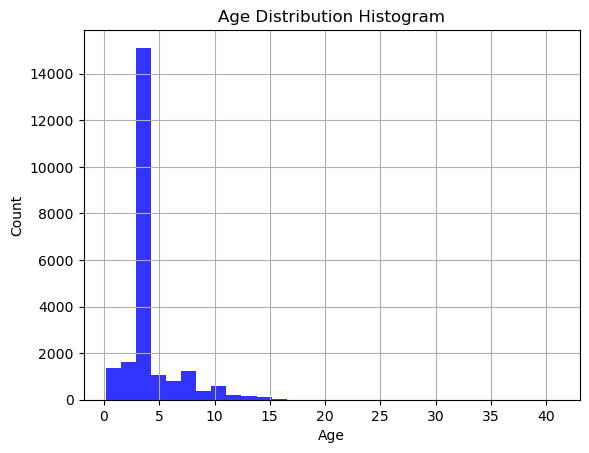

In [35]:
plt.hist(df['Age'], bins=30, color='blue', alpha=0.8)
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)      ######Turns on the grid in the plot for better readability.##########
plt.show()

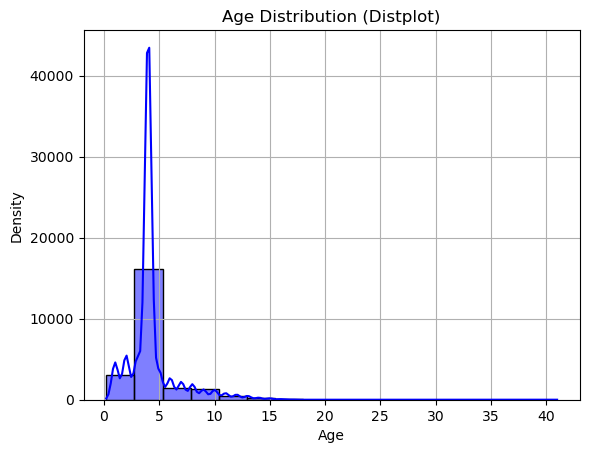

In [36]:
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution (Distplot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

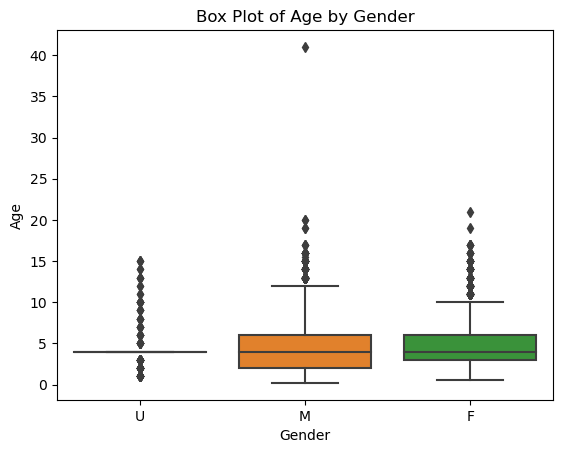

In [37]:
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Box Plot of Age by Gender')
plt.show()


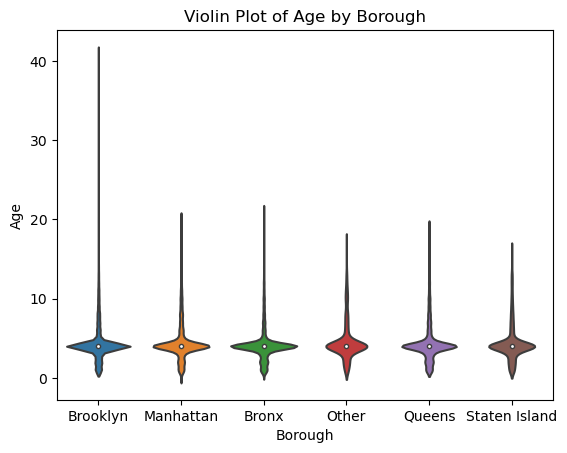

In [38]:
sns.violinplot(x='Borough', y='Age', data=df)
plt.title('Violin Plot of Age by Borough')
plt.show()

In [39]:
daily_incidents = df.groupby('DateOfBite').size()


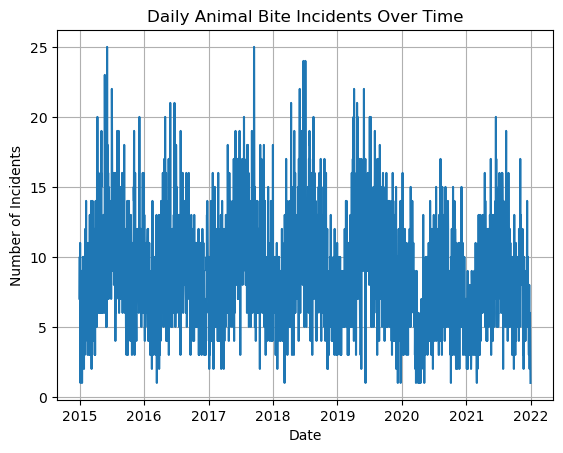

In [40]:
plt.plot(daily_incidents.index, daily_incidents.values)
plt.title('Daily Animal Bite Incidents Over Time')      ###### Plotting the line chart#####
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [41]:
df.corr(numeric_only=True)

,UniqueID,Age,SpayNeuter
UniqueID,1.000000,0.026143,0.047549
Age,0.026143,1.000000,0.210833
SpayNeuter,0.047549,0.210833,1.000000


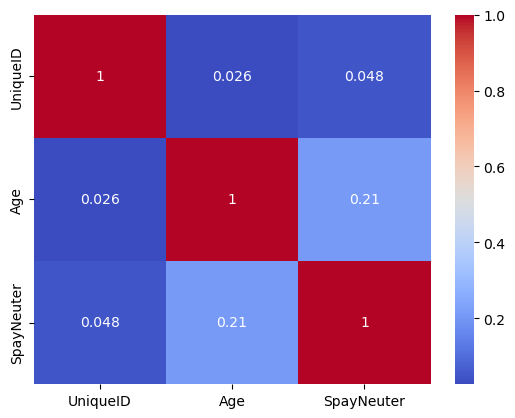

In [42]:
sns.heatmap(df.corr(numeric_only=True),
           yticklabels=True,
           cbar=True,
           cmap='coolwarm',
            #cmap='YLGnBu',
            annot=True,
            linewidths=0,
            linecolor='grey')
plt.show()
